In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = "df_imputed.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 1729 non-null   int64  
 1   Unnamed: 0                   1729 non-null   int64  
 2   months_as_customer           1729 non-null   int64  
 3   age                          1729 non-null   int64  
 4   policy_number                1729 non-null   int64  
 5   policy_bind_date             1729 non-null   object 
 6   policy_state                 1729 non-null   object 
 7   policy_csl                   1729 non-null   object 
 8   policy_deductable            1729 non-null   int64  
 9   policy_annual_premium        1729 non-null   float64
 10  umbrella_limit               1729 non-null   int64  
 11  insured_zip                  1729 non-null   int64  
 12  insured_sex                  1729 non-null   object 
 13  insured_education_

In [7]:
data["policy_state"].value_counts()

IL    609
OH    601
IN    519
Name: policy_state, dtype: int64

In [42]:
data.head()

,Unnamed: 0.1,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,0,0,267,40,426708,2009-10-09,IL,250/500,500,1155.53,...,NO,5670,1260,630,3780,Ford,F150,1997,N,NaN
1,1,1,322,44,769602,2004-12-19,IL,100/300,1000,1156.19,...,?,49400,9880,4940,34580,Jeep,Wrangler,2010,N,NaN
2,2,2,259,45,608443,2006-12-21,IL,500/1000,2000,1175.07,...,NO,87780,7980,7980,71820,Honda,CRV,2011,N,NaN
3,3,3,446,61,259792,1999-04-07,IL,100/300,1000,1232.79,...,YES,70500,7050,14100,49350,Suburu,Forrestor,2007,N,NaN
4,4,4,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [19]:
data

,Unnamed: 0.1,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,0,0,267,40,426708,2009-10-09,IL,250/500,500,1155.53,...,NO,5670,1260,630,3780,Ford,F150,1997,N,NaN
1,1,1,322,44,769602,2004-12-19,IL,100/300,1000,1156.19,...,?,49400,9880,4940,34580,Jeep,Wrangler,2010,N,NaN
2,2,2,259,45,608443,2006-12-21,IL,500/1000,2000,1175.07,...,NO,87780,7980,7980,71820,Honda,CRV,2011,N,NaN
3,3,3,446,61,259792,1999-04-07,IL,100/300,1000,1232.79,...,YES,70500,7050,14100,49350,Suburu,Forrestor,2007,N,NaN
4,4,4,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,1724,1724,85,25,159768,2008-09-03,IN,250/500,500,1259.02,...,?,5640,940,940,3760,Nissan,Ultima,2005,N,NaN
1725,1725,1725,131,33,432740,1990-10-09,IL,100/300,2000,1081.17,...,NO,4900,490,490,3920,Toyota,Camry,2010,N,NaN
1726,1726,1726,194,35,275092,2012-03-14,IL,500/1000,500,1416.24,...,?,5940,1080,540,4320,Nissan,Pathfinder,2003,N,NaN
1727,1727,1727,210,37,218684,2006-08-05,IN,500/1000,2000,1048.46,...,?,7080,1180,590,5310,Dodge,RAM,1999,N,NaN


In [20]:
data["fraud_reported"].value_counts()

N    1482
Y     247
Name: fraud_reported, dtype: int64

In [21]:
fraud = data[data["fraud_reported"]=="Y"]
nofraud = data[data["fraud_reported"]=="N"]

In [22]:
fraud.describe()

,Unnamed: 0.1,Unnamed: 0,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,0.0
mean,875.554656,875.554656,208.080972,39.141700,533030.206478,1151.821862,1250.236275,1.336032e+06,503637.959514,24193.522267,...,11.696356,1.931174,1.040486,1.582996,60302.105263,8208.340081,8560.121457,43533.643725,2005.186235,NaN
std,474.485417,474.485417,119.824064,9.648295,256334.029066,628.123674,253.263651,2.494799e+06,70487.502045,27766.252081,...,6.888256,1.047315,0.830308,1.066962,20746.279567,4550.307780,4631.741098,14849.388907,6.071871,NaN
min,6.000000,6.000000,3.000000,19.000000,104594.000000,500.000000,484.670000,0.000000e+00,430141.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,2860.000000,0.000000,0.000000,2080.000000,1995.000000,NaN
25%,497.000000,497.000000,116.000000,32.000000,332231.000000,500.000000,1062.615000,0.000000e+00,452924.500000,0.000000,...,6.000000,1.000000,0.000000,1.000000,51910.000000,5370.000000,5815.000000,37170.000000,2000.000000,NaN
50%,889.000000,889.000000,199.000000,38.000000,516959.000000,1000.000000,1269.640000,0.000000e+00,469853.000000,0.000000,...,12.000000,1.000000,1.000000,2.000000,61290.000000,7240.000000,7440.000000,44800.000000,2006.000000,NaN
75%,1275.000000,1275.000000,279.000000,45.000000,736652.500000,2000.000000,1396.330000,0.000000e+00,603807.000000,48850.000000,...,17.000000,3.000000,2.000000,2.000000,72665.000000,11900.000000,11300.000000,52080.000000,2011.000000,NaN
max,1720.000000,1720.000000,478.000000,63.000000,999435.000000,2000.000000,1935.850000,1.000000e+07,620819.000000,91900.000000,...,23.000000,4.000000,2.000000,3.000000,112320.000000,20700.000000,21810.000000,77760.000000,2015.000000,NaN


In [23]:
# data['months_as_customer'] = np.sqrt(data['months_as_customer'])

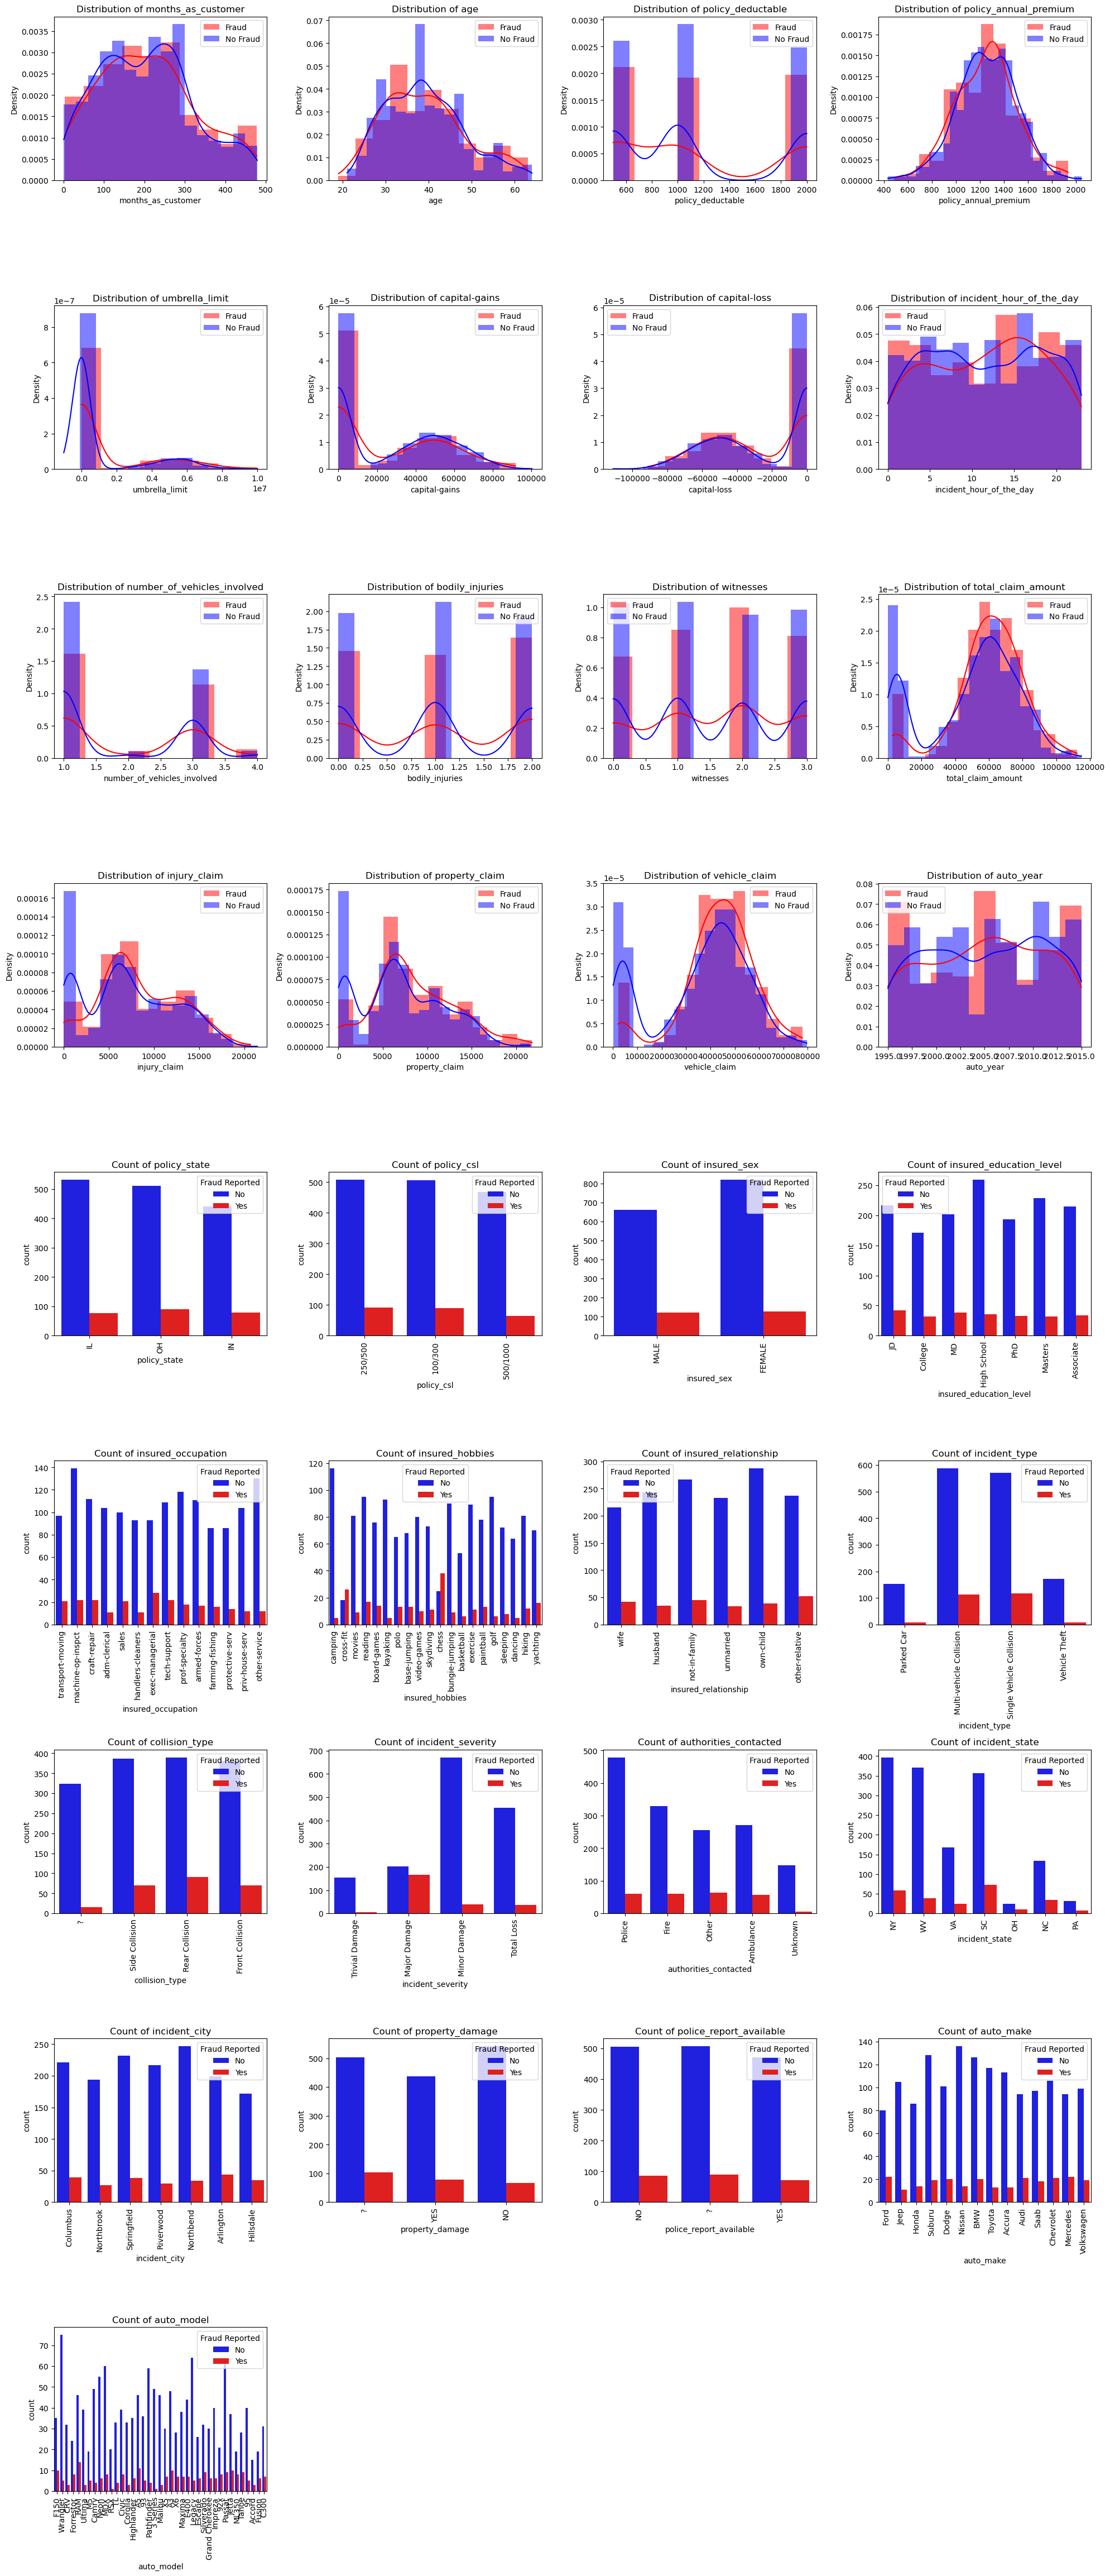

In [24]:

# Define the features to plot
features = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
            'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
            'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
            'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day',
            'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available',
            'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
            'auto_year']

# Plot numerical features
numerical_features = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
                      'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
                      'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 
                      'vehicle_claim', 'auto_year']

# Create a figure with 10x4 subplots
fig, axes = plt.subplots(10, 4, figsize=(20, 50))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(fraud[feature], color='red', label='Fraud', kde=True, stat="density", linewidth=0, ax=axes[i])
    sns.histplot(nofraud[feature], color='blue', label='No Fraud', kde=True, stat="density", linewidth=0, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()

# Plot categorical features
categorical_features = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation',
                        'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
                        'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 
                        'police_report_available', 'auto_make', 'auto_model']

for i, feature in enumerate(categorical_features, start=len(numerical_features)):
    sns.countplot(data=data, x=feature, hue='fraud_reported', palette={'Y': 'red', 'N': 'blue'}, ax=axes[i])
    axes[i].set_title(f'Count of {feature}')
    axes[i].legend(title='Fraud Reported', labels=['No', 'Yes'])
    axes[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('EDAaftercleaning.jpg', format='jpg')
plt.show()


In [45]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [44]:
data = data.drop(columns=["Unnamed: 0.1","Unnamed: 0", "capital-loss", "_c39"])

In [39]:
data["umbrella_limit"].value_counts()


 0           1380
 6000000      101
 5000000      100
 4000000       59
 7000000       38
 3000000       23
 8000000       14
 9000000        6
 2000000        5
 10000000       2
-1000000        1
Name: umbrella_limit, dtype: int64

In [40]:
data[data["umbrella_limit"]<0]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1637,284,42,526039,1995-05-04,OH,100/300,500,1338.54,-1000000,438178,...,1,?,94160,8560,17120,68480,Chevrolet,Malibu,1996,N
